In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import csv
import os
from pathlib import Path

In [300]:
coffee_qlty_df = pd.read_csv("Coffee_qlty.csv")
coffee_statistics_df = pd.read_csv("Stats_coffee.csv")
population_df = pd.read_csv("Population.csv")
coffee_qlty_df.head(20)

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51
5,Cote dIvoire,7.420000,7.250000,6.830000,7.000000,7.330000,7.080000,9.330000,10.000000,10.000000,0.130000,0.000000,1.000000,2.000000,1
6,Ecuador,7.583333,7.640000,7.553333,7.693333,6.026667,6.970000,10.000000,10.000000,8.723333,0.030000,0.000000,0.000000,0.333333,3
7,El Salvador,7.674762,7.654286,7.567143,7.590476,7.606667,7.711429,9.936190,9.936190,9.808571,0.045714,0.095238,0.142857,3.571429,21
8,Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,0.082955,0.363636,0.250000,5.159091,44
9,Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,0.102265,0.276243,0.187845,3.419890,181


In [302]:
coffee_qlty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country.of.Origin         34 non-null     object 
 1   AVG_Aroma                 34 non-null     float64
 2   AVG_Flavor                34 non-null     float64
 3   AVG_Aftertaste            34 non-null     float64
 4   AVG_Acidity               34 non-null     float64
 5   AVG_Body                  34 non-null     float64
 6   AVG_Balance               34 non-null     float64
 7   AVG_Uniformity            34 non-null     float64
 8   AVG_Clean.Cup             34 non-null     float64
 9   AVG_Sweetness             34 non-null     float64
 10  AVG_Moisture              34 non-null     float64
 11  AVG_Quakers               34 non-null     float64
 12  AVG_Category.One.Defects  34 non-null     float64
 13  AVG_Category.Two.Defects  34 non-null     float64
 14  Rec_Cnt     

In [304]:
coffee_qlty_df.columns

Index(['Country.of.Origin', 'AVG_Aroma', 'AVG_Flavor', 'AVG_Aftertaste',
       'AVG_Acidity', 'AVG_Body', 'AVG_Balance', 'AVG_Uniformity',
       'AVG_Clean.Cup', 'AVG_Sweetness', 'AVG_Moisture', 'AVG_Quakers',
       'AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt'],
      dtype='object')

In [306]:
# Renaming
qlty_renamed_df = coffee_qlty_df.rename(columns = {'Country.of.Origin' : 'Country of origin', 'AVG_Aroma': 'Aroma score'})
qlty_renamed_df.head()

,Country of origin,Aroma score,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51


In [308]:
# Dropping unnessaccary columns (Last 3 columns)
qlty_dropped_df = qlty_renamed_df[['Country of origin', 'Aroma score', 'AVG_Flavor', 'AVG_Aftertaste',
       'AVG_Acidity', 'AVG_Body', 'AVG_Balance', 'AVG_Sweetness', 'AVG_Moisture']]
qlty_dropped_df.head()

,Country of origin,Aroma score,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Sweetness,AVG_Moisture
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333


In [310]:
qlty_renamed_cols_df = qlty_dropped_df.rename(columns = {'AVG_Flavor': 'Flavor score', 'AVG_Aftertaste':'Aftertaste score',
       'AVG_Acidity': 'Acidity score', 'AVG_Body': 'Body score', 'AVG_Balance': 'Balance score', 'AVG_Sweetness':'Sweetness score', 'AVG_Moisture': 'Moisture score'})
qlty_renamed_cols_df.head()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333


In [312]:
qlty_renamed_cols_df.columns

Index(['Country of origin', 'Aroma score', 'Flavor score', 'Aftertaste score',
       'Acidity score', 'Body score', 'Balance score', 'Sweetness score',
       'Moisture score'],
      dtype='object')

In [314]:
qlty_renamed_cols_df.dtypes

Country of origin     object
Aroma score          float64
Flavor score         float64
Aftertaste score     float64
Acidity score        float64
Body score           float64
Balance score        float64
Sweetness score      float64
Moisture score       float64
dtype: object

In [316]:
qlty_renamed_cols_df.tail()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score
29,Thailand,7.484063,7.528125,7.473438,7.597188,7.552187,7.524063,9.958125,0.090938
30,Uganda,7.884167,7.752778,7.622500,7.708611,7.720000,7.662500,9.363333,0.113611
31,United States,7.605977,7.622529,7.541609,7.651609,7.652414,7.664138,9.643218,0.050920
32,Vietnam,7.386250,7.375000,7.197500,7.362500,7.542500,7.457500,9.583750,0.067500
33,Zambia,7.670000,7.080000,7.420000,7.330000,7.750000,7.420000,10.000000,0.000000


In [318]:

qlty_renamed_cols_df['Mean_overall'] = qlty_renamed_cols_df[['Aroma score', 'Flavor score', 'Aftertaste score',
                                                    'Acidity score', 'Body score', 'Balance score', 
                                                    'Sweetness score', 'Moisture score']].mean(axis=1)
qlty_renamed_cols_df.head()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score,Mean_overall
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348,6.898305
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000,6.788125
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375,6.932734
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022,6.958436
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333,6.935441


### Cleaning up coffee_statistics_df

In [321]:
coffee_statistics_df.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
coffee_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 6016 non-null   object
 1   Year                    6016 non-null   int64 
 2   Arabica Production      6016 non-null   int64 
 3   Bean Exports            6016 non-null   int64 
 4   Bean Imports            6016 non-null   int64 
 5   Beginning Stocks        6016 non-null   int64 
 6   Domestic Consumption    6016 non-null   int64 
 7   Ending Stocks           6016 non-null   int64 
 8   Exports                 6016 non-null   int64 
 9   Imports                 6016 non-null   int64 
 10  Other Production        6016 non-null   int64 
 11  Production              6016 non-null   int64 
 12  Roast & Ground Exports  6016 non-null   int64 
 13  Roast & Ground Imports  6016 non-null   int64 
 14  Robusta Production      6016 non-null   int64 
 15  Rst,

### Picking 2013-2023 data

In [326]:
stats_filtered_df = coffee_statistics_df[coffee_statistics_df['Year'].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]
stats_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 53 to 6015
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 1034 non-null   object
 1   Year                    1034 non-null   int64 
 2   Arabica Production      1034 non-null   int64 
 3   Bean Exports            1034 non-null   int64 
 4   Bean Imports            1034 non-null   int64 
 5   Beginning Stocks        1034 non-null   int64 
 6   Domestic Consumption    1034 non-null   int64 
 7   Ending Stocks           1034 non-null   int64 
 8   Exports                 1034 non-null   int64 
 9   Imports                 1034 non-null   int64 
 10  Other Production        1034 non-null   int64 
 11  Production              1034 non-null   int64 
 12  Roast & Ground Exports  1034 non-null   int64 
 13  Roast & Ground Imports  1034 non-null   int64 
 14  Robusta Production      1034 non-null   int64 
 15  Rst,Grou

In [328]:
stats_filtered_df.head(50)

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
53,Albania,2013,0,0,90,0,90,0,0,90,...,0,0,0,0,90,0,0,0,90,90
54,Albania,2014,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
55,Albania,2015,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
56,Albania,2016,0,0,105,0,105,0,0,105,...,0,0,0,0,105,0,0,0,105,105
57,Albania,2017,0,0,105,0,105,0,0,105,...,0,0,0,0,105,0,0,0,105,105
58,Albania,2018,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
59,Albania,2019,0,0,90,0,90,0,0,90,...,0,0,0,0,90,0,0,0,90,90
60,Albania,2020,0,0,100,0,100,0,0,100,...,0,0,0,0,100,0,0,0,100,100
61,Albania,2021,0,0,85,0,85,0,0,85,...,0,0,0,0,85,0,0,0,85,85
62,Albania,2022,0,0,70,0,70,0,0,70,...,0,0,0,0,70,0,0,0,70,70


In [330]:
stats_filtered_df.columns

Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production',
       'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'],
      dtype='object')

### Dropping unneccessary columns in stats_filtered_df and named df as stats_dropped_df. 

In [333]:
stats_dropped_df = stats_filtered_df[['Country', 'Year','Domestic Consumption','Exports',
       'Imports', ]]
stats_dropped_df.head()

,Country,Year,Domestic Consumption,Exports,Imports
53,Albania,2013,90,0,90
54,Albania,2014,100,0,100
55,Albania,2015,100,0,100
56,Albania,2016,105,0,105
57,Albania,2017,105,0,105


### Grouping countries with mean values to find top countries, and dropping unneccessary column [Year]. 

In [336]:
stats_grouped_df = stats_dropped_df.groupby('Country').mean().reset_index()
stats_grouped_dropped_df = stats_grouped_df.drop(columns = ['Year'])
stats_grouped_dropped_df.head()

,Country,Domestic Consumption,Exports,Imports
0,Albania,91.363636,0.000000,91.363636
1,Algeria,2184.545455,0.000000,2184.545455
2,Angola,14.454545,11.272727,0.000000
3,Argentina,819.363636,0.000000,819.363636
4,Armenia,193.636364,0.000000,193.636364


In [338]:
stats_grouped_dropped_df.to_csv("Avg_Import_export.csv", encoding="UTF-8", index=False, header=True)

### Top exporting countries for Bar Plot (by qualities) to show which type is predominantly exported. 

In [341]:
stats_grouped_dropped_df.sort_values(by = ['Exports'], ascending = False)

,Country,Domestic Consumption,Exports,Imports
9,Brazil,21941.272727,37894.000000,64.090909
89,Vietnam,2805.909091,27088.363636,737.000000
16,Colombia,1779.090909,12433.636364,1183.545455
39,Indonesia,3939.818182,8056.727273,1230.454545
38,India,1182.818182,5869.363636,1409.818182
...,...,...,...,...
55,Morocco,781.363636,0.000000,781.363636
56,New Caledonia,0.000000,0.000000,0.000000
57,New Zealand,438.454545,0.000000,438.454545
60,North Macedonia,96.545455,0.000000,96.545455


### Top 5 exporting countries with values of 2013-2023 for dropdown button for HTML.

In [344]:
top_5_exports = stats_filtered_df[stats_filtered_df['Country'].isin(['Brazil', 'Vietnam', 'Colombia', 'Indonesia', 'India'])]
top_5_exports.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
629,Brazil,2013,41800,30600,0,9068,20210,11946,34146,34,...,57200,30,34,15400,19130,1080,3516,0,66302,66302
630,Brazil,2014,37300,33051,0,11946,20420,9305,36573,52,...,54300,28,52,17000,19325,1095,3494,0,66298,66298
631,Brazil,2015,36100,31870,0,9305,20855,2372,35543,65,...,49400,28,65,13300,19750,1105,3645,0,58770,58770
632,Brazil,2016,45600,29325,0,2372,21625,3828,33081,62,...,56100,31,62,10500,20500,1125,3725,0,58534,58534
633,Brazil,2017,39500,26938,0,3828,22420,3115,30454,61,...,52100,20,61,12600,21275,1145,3496,0,55989,55989


In [346]:
top_5_exports.columns

Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production',
       'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'],
      dtype='object')

In [348]:
top_5_exports2 = top_5_exports.drop(columns = ['Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Ending Stocks', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production','Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'])
top_5_exports2.head()

,Country,Year,Domestic Consumption,Exports,Imports
629,Brazil,2013,20210,34146,34
630,Brazil,2014,20420,36573,52
631,Brazil,2015,20855,35543,65
632,Brazil,2016,21625,33081,62
633,Brazil,2017,22420,30454,61


In [350]:
top_5_exports2.to_csv("top_5_exports.csv", encoding="UTF-8", index=False, header=True)

### Top importing countries or consumers for Bar Plot (by qualities) to show which type is predominantly imported.

In [353]:
stats_grouped_dropped_df.sort_values(by = ['Imports'], ascending = False)

,Country,Domestic Consumption,Exports,Imports
29,European Union,42148.272727,3117.818182,45106.363636
86,United States,25407.727273,92.727273,25481.818182
42,Japan,7671.363636,0.000000,7582.272727
66,Philippines,6147.272727,0.000000,5715.909091
12,Canada,4863.181818,0.000000,4863.181818
...,...,...,...,...
28,Ethiopia,3190.181818,4043.727273,0.000000
27,Equatorial Guinea,0.000000,0.000000,0.000000
68,Rwanda,0.000000,272.727273,0.000000
41,Jamaica,4.818182,14.090909,0.000000


### Top 5 importing countries with values of 2013-2023 for line graphs for dropdown button in HTML.

In [356]:
top_5_imports = stats_filtered_df[stats_filtered_df['Country'].isin(['European Union', 'United States', 'Japan', 'Philipines', 'Canada'])]
top_5_imports.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
821,Canada,2013,0,0,2525,0,4605,0,0,4605,...,0,0,730,0,3255,1350,0,1350,4605,4605
822,Canada,2014,0,0,2450,0,4495,0,0,4495,...,0,0,765,0,3215,1280,0,1280,4495,4495
823,Canada,2015,0,0,2800,0,4545,0,0,4545,...,0,0,375,0,3175,1370,0,1370,4545,4545
824,Canada,2016,0,0,3030,0,4550,0,0,4550,...,0,0,220,0,3250,1300,0,1300,4550,4550
825,Canada,2017,0,0,3035,0,4750,0,0,4750,...,0,0,285,0,3320,1430,0,1430,4750,4750


In [358]:
top_5_imports2 = top_5_imports.drop(columns = ['Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Ending Stocks', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production','Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'])
top_5_imports2.head()

,Country,Year,Domestic Consumption,Exports,Imports
821,Canada,2013,4605,0,4605
822,Canada,2014,4495,0,4495
823,Canada,2015,4545,0,4545
824,Canada,2016,4550,0,4550
825,Canada,2017,4750,0,4750


In [360]:
top_5_imports2.to_csv("top_5_imports.csv", encoding="UTF-8", index=False, header=True)

# Cleaning population_data

In [363]:
population_df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [365]:
population_df.columns

Index(['Country', 'Population 2024', 'Population 2023', 'Area (km2)',
       'Density (/km2)', 'Growth Rate', 'World %', 'World Rank'],
      dtype='object')

In [367]:
population_dropped_df = population_df[['Country', 'Population 2023']]
population_dropped_df.head()                                     

,Country,Population 2023
0,India,1428627663
1,China,1425671352
2,United States,339996563
3,Indonesia,277534122
4,Pakistan,240485658


In [369]:
population_dropped_df.to_csv("Clean_population.csv", encoding="UTF-8", index=False, header=True)

In [371]:
population_dropped_df['Country'].count

<bound method Series.count of 0                 India
1                 China
2         United States
3             Indonesia
4              Pakistan
             ...       
229          Montserrat
230    Falkland Islands
231                Niue
232             Tokelau
233        Vatican City
Name: Country, Length: 234, dtype: object>

### The imported values by country in 2023 (to calculate per person usage)

In [374]:
export_2023_df = stats_filtered_df.loc[stats_filtered_df['Year']==2023, ['Country', 'Exports']]
export_2023_df.shape

(94, 2)

In [376]:
export_2023_df.head()

,Country,Exports
63,Albania,0
127,Algeria,0
191,Angola,15
255,Argentina,0
319,Armenia,0


### The exported values by country in 2023 (to calculate per person usage)

In [379]:
import_2023_df = stats_filtered_df.loc[stats_filtered_df['Year']==2023, ['Country', 'Imports']]
import_2023_df.shape

(94, 2)

In [381]:
import_2023_df.head()

,Country,Imports
63,Albania,60
127,Algeria,1950
191,Angola,0
255,Argentina,1040
319,Armenia,250


### Merge population_dropped_df with export_2023_df and import_2023_df

In [384]:
merged_pop_export_df = pd.merge(population_dropped_df, export_2023_df, on = ['Country'], how = 'left')
clean_pop_export_df = merged_pop_export_df.dropna(how = 'any')
clean_pop_export_df

,Country,Population 2023,Exports
0,India,1428627663,6336.0
1,China,1425671352,1175.0
2,United States,339996563,0.0
3,Indonesia,277534122,6050.0
5,Nigeria,223804632,0.0
...,...,...,...
151,Equatorial Guinea,1714671,0.0
152,Trinidad and Tobago,1534937,0.0
163,Guyana,813834,0.0
169,Montenegro,626485,0.0


In [386]:
merged_df = pd.merge(clean_pop_export_df, import_2023_df, on = ['Country'], how = 'left')
merged_df 

,Country,Population 2023,Exports,Imports
0,India,1428627663,6336.0,1550
1,China,1425671352,1175.0,4150
2,United States,339996563,0.0,25425
3,Indonesia,277534122,6050.0,1720
4,Nigeria,223804632,0.0,0
...,...,...,...,...
82,Equatorial Guinea,1714671,0.0,0
83,Trinidad and Tobago,1534937,0.0,0
84,Guyana,813834,0.0,0
85,Montenegro,626485,0.0,35


In [388]:
merged_renamed_df = merged_df.rename(columns = {'Population 2023': 'Population'})
merged_renamed_df

,Country,Population,Exports,Imports
0,India,1428627663,6336.0,1550
1,China,1425671352,1175.0,4150
2,United States,339996563,0.0,25425
3,Indonesia,277534122,6050.0,1720
4,Nigeria,223804632,0.0,0
...,...,...,...,...
82,Equatorial Guinea,1714671,0.0,0
83,Trinidad and Tobago,1534937,0.0,0
84,Guyana,813834,0.0,0
85,Montenegro,626485,0.0,35


### Calculate consumption of per person by countries 

In [391]:
merged_renamed_df['Consumption per person'] = merged_renamed_df['Imports']/merged_renamed_df['Population']
merged_renamed_df

,Country,Population,Exports,Imports,Consumption per person
0,India,1428627663,6336.0,1550,0.000001
1,China,1425671352,1175.0,4150,0.000003
2,United States,339996563,0.0,25425,0.000075
3,Indonesia,277534122,6050.0,1720,0.000006
4,Nigeria,223804632,0.0,0,0.000000
...,...,...,...,...,...
82,Equatorial Guinea,1714671,0.0,0,0.000000
83,Trinidad and Tobago,1534937,0.0,0,0.000000
84,Guyana,813834,0.0,0,0.000000
85,Montenegro,626485,0.0,35,0.000056


In [393]:
merged_renamed_df.drop(columns = ['Converted', 'Converted (kg)'])
merged_renamed_df['Consumption per person (lbs)'] = merged_renamed_df['Consumption per person']*130000
merged_renamed_df.head()

KeyError: "['Converted', 'Converted (kg)'] not found in axis"

In [395]:
merged_renamed_df2 = merged_renamed_df.drop(columns = ['Converted', 'Converted (kg)', 'Converted (oz)', 'Converted (lb)'])
merged_renamed_df2.head()

KeyError: "['Converted', 'Converted (kg)', 'Converted (oz)', 'Converted (lb)'] not found in axis"

In [399]:
merged_renamed_df2.sort_values(by = 'Consumption per person (lbs)', ascending = False)

,Country,Population,Exports,Imports,Consumption per person,Consumption per person (lbs)
60,Switzerland,8796669,1850.0,3500,0.000398,51.724124
69,Norway,5474360,0.0,790,0.000144,18.760184
24,Canada,38781291,0.0,5400,0.000139,18.101512
70,New Zealand,5228100,0.0,560,0.000107,13.924753
63,Serbia,7149077,0.0,715,0.000100,13.001678
...,...,...,...,...,...,...
40,Zambia,20569737,0.0,0,0.000000,0.000000
39,Malawi,20931751,9.0,0,0.000000,0.000000
64,Paraguay,6861524,0.0,0,0.000000,0.000000
38,Sri Lanka,21893579,0.0,0,0.000000,0.000000


### Who is drinking more coffee???

In [402]:
merged_renamed_df2.to_csv("Per_consumption.csv", encoding="UTF-8", index=False, header=True)

### Visualizing with heatmap (by qlty_renamedAll_df['Mean_overall'])

In [405]:
qlty_renamed_cols_df.head()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score,Mean_overall
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348,6.898305
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000,6.788125
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375,6.932734
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022,6.958436
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333,6.935441


In [407]:
qlty_renamed_cols_df_copy = qlty_renamed_cols_df.copy()

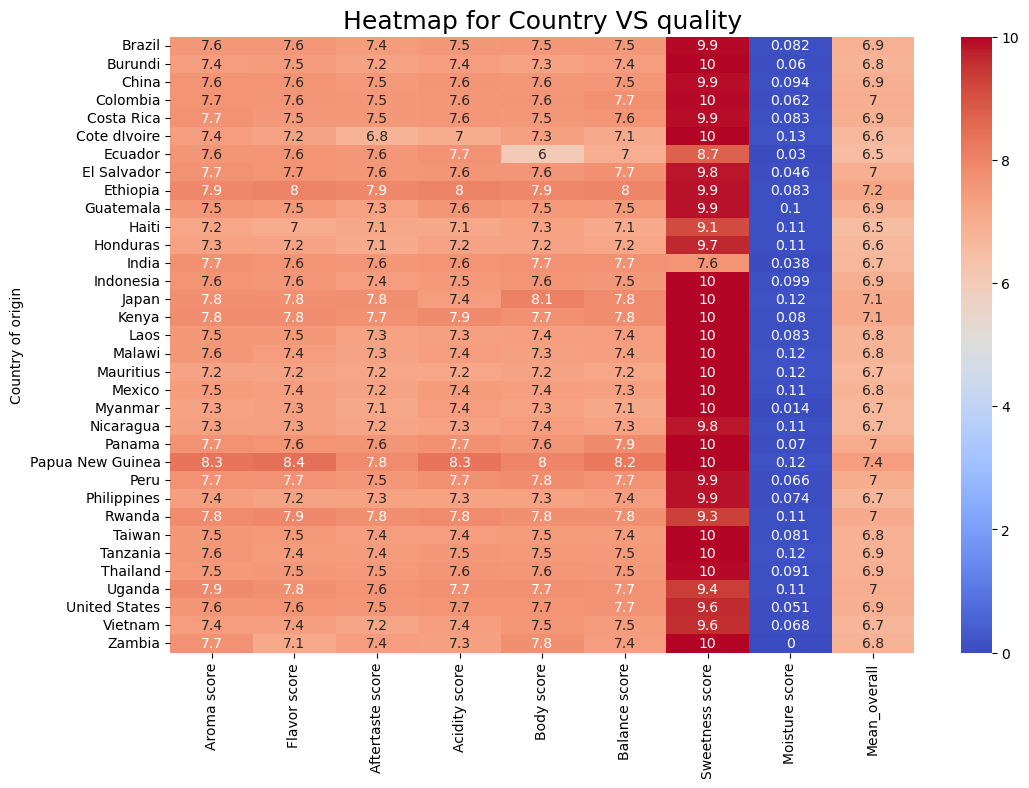

In [409]:
# Set the index to 'Country of origin' for better visualization
qlty_renamed_cols_df_copy.set_index('Country of origin', inplace=True)

# Create a heatmap for the given data without using correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(qlty_renamed_cols_df_copy, annot=True, cmap='coolwarm')
plt.title('Heatmap for Country VS quality', size=18)
plt.show()

### Merging qlty_renamed_All_df with merged_renamed_df for another heatmap for 
### correlation of quality with import/export/consumption.


In [413]:
merged_final_heatmap_df = pd.merge(qlty_renamed_cols_df, merged_renamed_df2, left_on = ['Country of origin'], right_on = ['Country'])
merged_final_heatmap_df.head()

,Country of origin,Aroma score,Flavor score,Aftertaste score,Acidity score,Body score,Balance score,Sweetness score,Moisture score,Mean_overall,Country,Population,Exports,Imports,Consumption per person,Consumption per person (lbs)
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.949394,0.082348,6.898305,Brazil,216422446,43850.0,75,3.465445e-07,0.045051
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,0.060000,6.788125,Burundi,13238559,200.0,0,0.000000e+00,0.000000
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.916250,0.094375,6.932734,China,1425671352,1175.0,4150,2.910909e-06,0.378418
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.952678,0.062022,6.958436,Colombia,52085168,12000.0,2505,4.809431e-05,6.252260
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.908431,0.083333,6.935441,Costa Rica,5212173,1210.0,170,3.261595e-05,4.240074


In [415]:
merged_final_heatmap_df.drop(['Country of origin','Country', 'Population', 'Consumption per person'], axis = 1, inplace = True)
merged_final_heatmap_df.columns

Index(['Aroma score', 'Flavor score', 'Aftertaste score', 'Acidity score',
       'Body score', 'Balance score', 'Sweetness score', 'Moisture score',
       'Mean_overall', 'Exports', 'Imports', 'Consumption per person (lbs)'],
      dtype='object')

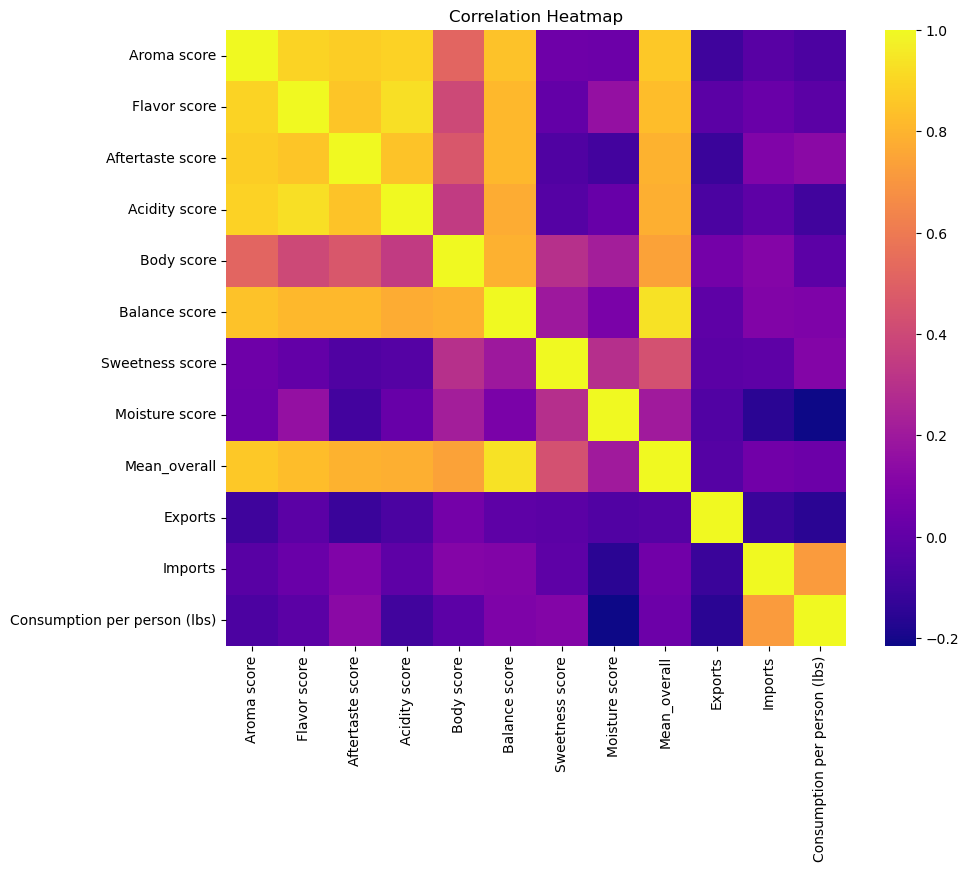

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
corr_matrix = merged_final_heatmap_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='plasma', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [419]:
stats_grouped_dropped_df.head()

,Country,Domestic Consumption,Exports,Imports
0,Albania,91.363636,0.000000,91.363636
1,Algeria,2184.545455,0.000000,2184.545455
2,Angola,14.454545,11.272727,0.000000
3,Argentina,819.363636,0.000000,819.363636
4,Armenia,193.636364,0.000000,193.636364


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3000x600 with 0 Axes>

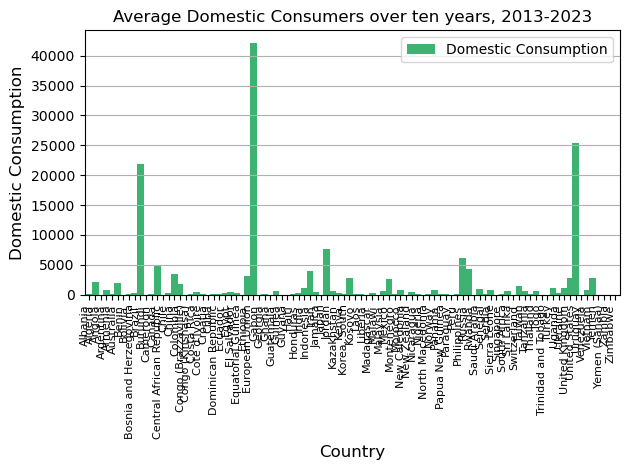

In [421]:
domestic_consumer = stats_grouped_dropped_df[['Country', 'Domestic Consumption']]

plt.figure(figsize = (30, 6))
domestic_consumer.plot(x='Country', kind = 'bar', color = 'mediumseagreen', width=1.2)
plt.title('Average Domestic Consumers over ten years, 2013-2023')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Domestic Consumption', fontsize = 12)
plt.xticks(rotation = 90, ha = 'right', fontsize = 8)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show


<Figure size 1000x600 with 0 Axes>

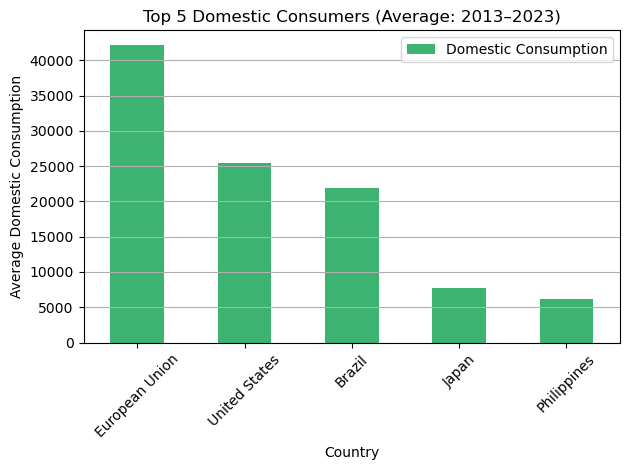

In [425]:
domestic_avg_consumers = domestic_consumer.sort_values(by = 'Domestic Consumption', ascending=False)
# Select the top 3 countries with the highest average domestic consumption
top_3_domestic_consumers = domestic_avg_consumers.head(5)
# Visualization for top 3 domestic consumers
plt.figure(figsize=(10, 6))
top_3_domestic_consumers.plot(x = 'Country', kind='bar', color='mediumseagreen')
plt.title('Top 5 Domestic Consumers (Average: 2013–2023)')
plt.xlabel('Country')
plt.ylabel('Average Domestic Consumption')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()